8-5 RNN 언어 모델(Recurrent Neural Network Language Model, RNNLM)

1. RNN 언어 모델(Recurrent Neural Network Language Model, RNNLM)\
앞서 언급된 n-gram 언어 모델과 NNLM은 고정된 개수의 단어만을 입력으로 받아야한다는 단점이 존재.\
하지만 시점(time stpe)이라는 개념이 도입된 RNN으로 언어 모델을 만들면 길이를 고정하지 않을 수 있다.

- 예문 : 'what will the fat cat sit on'\
언어 모델은 주어진 단어 시퀀스로부터 다음 단어를 예측하는 모델이다. \
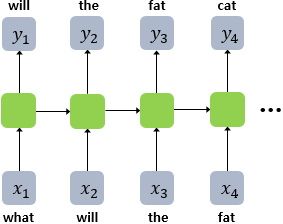\
RNNLM은 기본적으로 예측 과정에서 이전 시점의 출력을 현재 시점의 입력으로 한다. 결과적으로 cat이라는 단어는 앞서 나온\
what,will,the,fat 이라는 시퀀스로 인해 결정된 단어이다.\
위 과정은 훈련이 끝난 모델의 테스트 과정 동안(실제 사용할 때)의 이야기이다. 훈련 과정에서는 이전 시점의 예측 결과를 다음 시점의\
입력으로 넣으면서 예측하는 것이 아닌, what will the fat cat sit 시퀀스를 입력으로 넣어, what will the fat cat sit on을 예측하도록 훈련된다. \
will, the, fat, cat, sit, on는 각 시점의 레이블이다.

이러한 RNN 훈련 기법을 교사 강요(teacher forcing)라고 한다. 
- 교사 강요 : 테스트 과정에서 t-1 시점에서 예측한 값을 t 시점의 입력값으로 넣는것이 아닌, t-1 시점의 레이블(예측값이 아닌), 실제값을 t 시점의 입력값으로 사용하는것을 말한다. \
교사 강요를 사용하는 이유는 훈련 과정에서도 이전 시점의 출력을 다음 시점의 입력으로 사용하면서 훈련 시킬 수도 있지만 이는 한 번 잘못 예측하면 뒤에서의 예측까지 영향을 미쳐 훈련 시간이 느려지게 되므로 교사 강요를 사용하여 RNN을 좀 더 빠르고 효과적으로 훈련시킬 수 있기 때문이다.

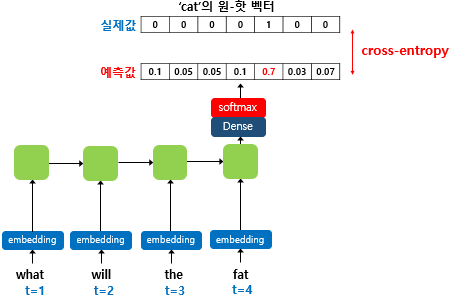\
훈련 과정 동안 출력층에서 사용하는 활성화 함수는 소프트맥스 함수이다. 그리고 모델이 예측한 값과 실제 레이블과의 오차를 계산하기 위해\
손실 함수로 크로스 엔트로피 함수를 사용한다. 이해를 돕기 위해 앞에서 배운 NNLM의 그림과 유사한 형태로 RNNLM을 시각화 해보겠다.\
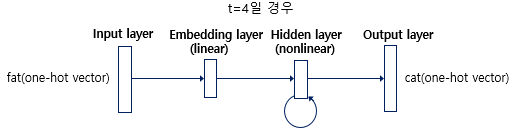

RNNLM은 위의 그림과 같이 총 4개의 층으로 이루어진 인공 신경망이다. 입력층을 보면 RNNLM의 현재 시점(time step)은 4로 가정한다.\
그래서 4번째 입력 단어인 fat의 원-핫 벡터가 입력이 된다.\
\
출력층을 살펴보면, 모델이 예측해야하는 정답에 해당되는 단어 cat의 원-핫 벡터는 출력층에서 모델이 예측한 값의 오차를 구하기 위해 사용된다.\
그리고 이 오차로부터 손실 함수를 사용해 인공 신경망이 학습을 하게 된다.

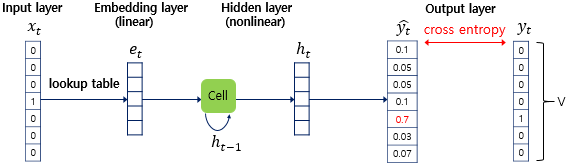\
현 시점의 입력 단어의 원-핫 벡터 x_{t}를 입력받은 RNNLM은 우선 임베딩층을 지난다. 이 임베딩층은 기본적으로 NNLM에서 배운 투사층이다.\
앞으로는 임베딩 벡터를 얻는 투사층을 임베딩층이라는 표현을 사용한다.\
\
단어 집합의 크기가 V일때, 임베딩 벡터의 크기를 M으로 설정하면, 각 입력 단어들은 임베딩층에서 V × M 크기의 임베딩 행렬과 곱해진다.\
이 임베딩 행렬은 역전파 과정에서 다른 가중치들과 함께 학습된다.이는 NNLM에서 배운 개념이다.

- 임베딩층 : e_{t} = lookup(x_{t})\
이 임베딩 벡터는 은닉층에서 이전 시점의 은닉 상태인 h_{t-1}과 함께 연산을 하여 현재 시점의 은닉 상태 h_{t}를 계산하게 된다.

- 은닉층 : h_{t} = tanh(W_{x} e_{t} + W_{h}h_{t−1} + b) \
출력층에서는 활성화 함수로 소프트맥스 함수를 사용하는데, V차원의 벡터는 소프트맥스 함수를 지나면서 각 원소는 0과 1사이의 실수 값을 가지며 총 합은 1이 되는 상태로 바뀐다. \
이렇게 나온 벡터를 RNNLM의 t시점의 예측값이라는 의미에서 \hat{y_{t}}라고 한다.

- 출력층 : \hat{y_{t}} = softmax(W_{y}h_{t} + b)\
벡터 \hat{y_{t}}의 각 차원 안에서의 값이 의미하는것은 \hat{y_{t}}의 j번째 인덱스가 가진 0과 1사이의 값은 j번째 단어가 다음 단어일 확률을 나타낸다.\
그리고 \hat{y_{t}}는 실제값, 즉 실제 정답에 해당되는 단어인 원-핫 벡터에 가까워져야 한다. 실제값 y와 예측값 \hat{y_{t}} 이 두 벡터가 가까워지게 하기위해서는 손실 함수로 크로스엔트로피 함수를 사용한다.\
그리고 역전파가 이루어지면서 가중치 행렬들이 학습되는데, 이 과정에서 임베딩 벡터값들도 학습이 된다.

룩업 테이블의 대상이 되는 테이블인 임베딩 행렬을 E라고 했을 때, 결과적으로 RNNLM에서 학습 과정에서 학습되는 가중치 행렬은 다음의 \
E, W_{x}, W_{h}, W_{y} 4개이다.
